# 使用OSMnx通过地名获取街道网络

In [1]:
import osmnx as ox
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11dev'

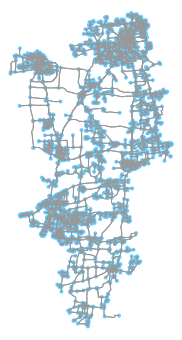

In [2]:
# 获取廊坊市的步行网络
G = ox.graph_from_place('Langfang, CN',which_result =2, network_type='walk')
fig, ax = ox.plot_graph(G)

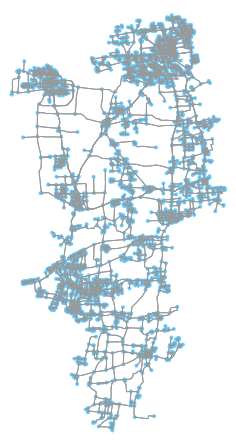

In [3]:
# 将路网投影到UTM
G_projected = ox.project_graph(G)
# 同时可以绘制并保存成SVGs图像文件，用于AI绘图
fig, ax = ox.plot_graph(G_projected, save=True, file_format='svg')


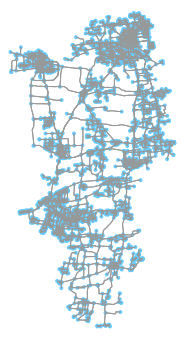

In [8]:
# 同样可以创建一个网络，使用地点及周围缓冲距离，单位m
G = ox.graph_from_place('Langfang, CN',which_result =2, network_type='walk', buffer_dist=200)
fig, ax = ox.plot_graph(ox.project_graph(G))


如果下载的路网是一个非常大的网络（例如，大城市或大城市规模），则先投影图形然后简化其拓扑会更快。

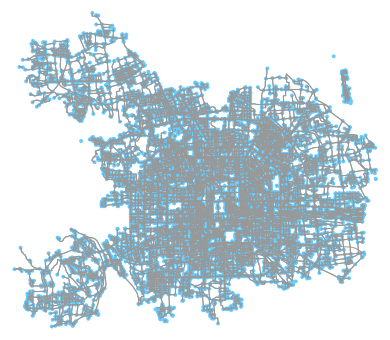

In [10]:
# 创建一个网络通过多个地点,北京市部分区机动车路网
places = [
    "Chaoyang District,Beijing, CN",
    'Haidian District,Beijing, CN',
    'Fengtai District,Beijing, CN',
    'Dongcheng District,Beijing, CN',
    "Xicheng District,Beijing, CN"
]
# 如果想保留所有不相交的子图（例如地点不相邻时），请选择保留全部
G = ox.graph_from_place(places, network_type='drive', retain_all=True)
fig, ax = ox.plot_graph(G, save=True, filename='places')


In [11]:
# 将路网保存成GraphML文件
ox.save_graphml(G, filename='Beijing_drive_roads.graphml')

# o或者将路网保存成shp文件
ox.save_graph_shapefile(G, filename='Beijing_drive_roads')

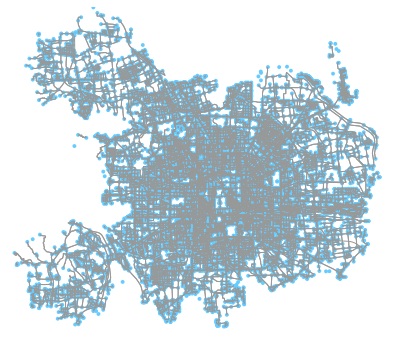

In [12]:
# 同样可以使用地点列表places,的buffer_dist缓冲距离创建一个网络，buffer_dist缓冲距离单位为m
G = ox.graph_from_place(places, network_type='drive', retain_all=True, buffer_dist=500)
fig, ax = ox.plot_graph(G)

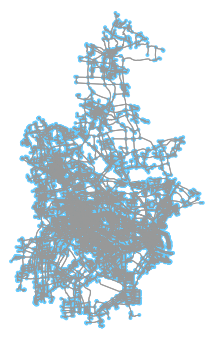

In [18]:
# 或者通过结构化的查询构建路网
places = [{'District':'Xiqing', 'state':'Tianjin'}, 
         {'District':'Nankai', 'state':'Tianjin'}]
G = ox.graph_from_place(places,which_result =1, network_type='drive', buffer_dist=500)
fig, ax = ox.plot_graph(G)

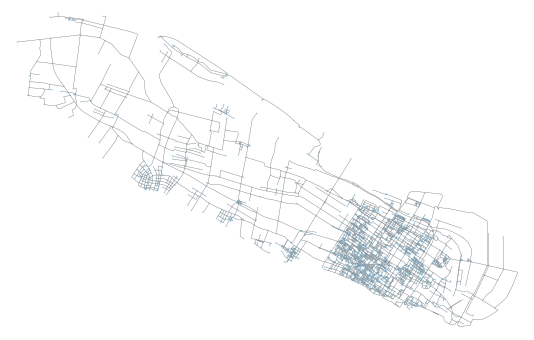

In [19]:
# 获取路网从小岛上
G = ox.graph_from_place('Chongming Island, Shanghai, CN', network_type='drive')
fig, ax = ox.plot_graph(G, fig_height=6, node_size=2, node_alpha=0.5,
                        edge_linewidth=0.3, save=True, dpi=100, filename='Chongming')

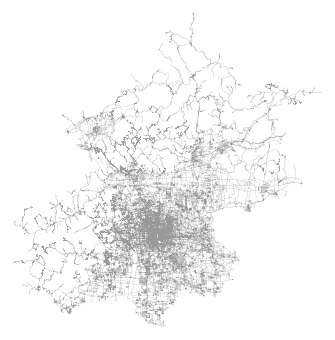

In [21]:
# 获得整个北京市的网络-花费几分钟完成所有下载和处理
place = 'Beijing, CN'
G = ox.graph_from_place(place,which_result=2,network_type='drive_service', simplify=False, retain_all=True)
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.1, save=True, filename='BJ')


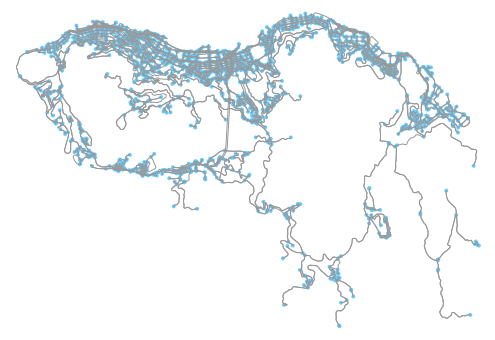

In [23]:
# 创建一个路网包含香港岛
G = ox.graph_from_place('Hong Kong Island', network_type='drive')

# 将路网投影到UTM
G_projected = ox.project_graph(G)
fig, ax = ox.plot_graph(G_projected)